<img src = "../Assets/imgs/ML-Codo-g.jpg" alt = "Encabezado MLDS" width = "25%" style="float: left; margin-right:20px" >  </img>

## **MeLi Challenge - Similitud de items**
### **Notebook 00: Exploración de la API y pruebas**
**Por: Andrés Felipe Camacho Baquero - [Personal website](https://anfelipecb.github.io/)**


Este código hace una exploración a profundidad de la `API`, y paso a paso va mostrando la limpieza y preprocesamiento que hice. Como es el notebook `00`es un compendio de todo el proyecto y de los pasos lógicos que me llevaron a la solución, pero no debe tenerse en cuenta como el código final. 

### Podemos empezar en el notebook `01`


Para garantizar una adecuada organización y gestión de las dependencias que usaremos, configuaremos un entorno virtual en el mismo repositorio (ver archivo README.md)

In [1]:
!pip3 install requests pandas plotly matplotlib nltk Pillow tensorflow
!pip3 install "nbformat>=4.2.0"
!pip3 install ipywidgets

In [3]:
import sys 
import os 
print(sys.executable) #Verificamos que estamos corriendo el jupyter en el entorno virtual definido para ello.
print(os.getcwd()) # veriicamos el directorio donde tenemos el repo local
sys.path.append('../similarity') #Agrego el paquete de python que cree para las funciones personalizadas

/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/melienv/bin/python
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/Notebooks


In [3]:
#Funciones paa obtener las categorias 

In [4]:
# Categrías de los ítems en marketplace
import requests
from similarity.config import API_URL
cats=requests.get(f'{API_URL}/sites/MLA/categories') #MLA hace referencia a argentina, que es el país escogido
cats.json()

/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final


[{'id': 'MLA5725', 'name': 'Accesorios para Vehículos'},
 {'id': 'MLA1512', 'name': 'Agro'},
 {'id': 'MLA1403', 'name': 'Alimentos y Bebidas'},
 {'id': 'MLA1071', 'name': 'Animales y Mascotas'},
 {'id': 'MLA1367', 'name': 'Antigüedades y Colecciones'},
 {'id': 'MLA1368', 'name': 'Arte, Librería y Mercería'},
 {'id': 'MLA1743', 'name': 'Autos, Motos y Otros'},
 {'id': 'MLA1384', 'name': 'Bebés'},
 {'id': 'MLA1246', 'name': 'Belleza y Cuidado Personal'},
 {'id': 'MLA1039', 'name': 'Cámaras y Accesorios'},
 {'id': 'MLA1051', 'name': 'Celulares y Teléfonos'},
 {'id': 'MLA1648', 'name': 'Computación'},
 {'id': 'MLA1144', 'name': 'Consolas y Videojuegos'},
 {'id': 'MLA1500', 'name': 'Construcción'},
 {'id': 'MLA1276', 'name': 'Deportes y Fitness'},
 {'id': 'MLA5726', 'name': 'Electrodomésticos y Aires Ac.'},
 {'id': 'MLA1000', 'name': 'Electrónica, Audio y Video'},
 {'id': 'MLA2547', 'name': 'Entradas para Eventos'},
 {'id': 'MLA407134', 'name': 'Herramientas'},
 {'id': 'MLA1574', 'name': 'H

In [5]:
#items
import requests
cat_id='MLA1000' #  me voy con ML1000 que es en general electrónica, audio y video. 
#cat_id='MLA409810' #MLA409810 solo los auriculares bluetooth que vi, pero hay otros con otro_id
offset=0

url= f'{API_URL}/sites/MLA/search?category={cat_id}&offset={offset}'

request=requests.get(url)
items=request.json()



In [6]:
items
# Con estos primeros 50 datos vamos a armar una base de datos. 

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'paging': {'total': 473986,
  'primary_results': 1000,
  'offset': 0,
  'limit': 50},
 'results': [{'id': 'MLA1470370644',
   'title': '20 X Pilas Aaa Energizer Max E92 Pilas Alcalinas 1.5v',
   'condition': 'new',
   'thumbnail_id': '976056-MLA74192071235_012024',
   'catalog_product_id': 'MLA22288649',
   'listing_type_id': 'gold_special',
   'permalink': 'https://www.mercadolibre.com.ar/20-x-pilas-aaa-energizer-max-e92-pilas-alcalinas-15v/p/MLA22288649',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA6384',
   'domain_id': 'MLA-CELL_BATTERIES',
   'thumbnail': 'http://http2.mlstatic.com/D_976056-MLA74192071235_012024-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 12881.63,
   'original_price': None,
   'sale_price': None,
   'available_quantity': 250,
   'official_store_id': None,
   'use_thumbnail_id': True,
   'accepts_mercadopago': True,
   'shipping': {'store_pick_up':

In [7]:
item=items['results'][0] # primer resultado
attributes=item['attributes'] #Dentro del diccionario de atributos encontramos caracteristicas útiles
attributes

[{'id': 'BRAND',
  'name': 'Marca',
  'value_id': '15375',
  'value_name': 'Energizer',
  'attribute_group_id': 'OTHERS',
  'attribute_group_name': 'Otros',
  'value_struct': None,
  'values': [{'id': '15375',
    'name': 'Energizer',
    'struct': None,
    'source': 1}],
  'source': 1,
  'value_type': 'string'},
 {'id': 'ITEM_CONDITION',
  'name': 'Condición del ítem',
  'value_id': '2230284',
  'value_name': 'Nuevo',
  'attribute_group_id': 'OTHERS',
  'attribute_group_name': 'Otros',
  'value_struct': None,
  'values': [{'id': '2230284',
    'name': 'Nuevo',
    'struct': None,
    'source': 6808261514773724}],
  'source': 6808261514773724,
  'value_type': 'list'},
 {'id': 'LINE',
  'name': 'Línea',
  'value_id': '18167',
  'value_name': 'MAX',
  'attribute_group_id': 'OTHERS',
  'attribute_group_name': 'Otros',
  'value_struct': None,
  'values': [{'id': '18167', 'name': 'MAX', 'struct': None, 'source': 1}],
  'source': 1,
  'value_type': 'string'},
 {'id': 'MODEL',
  'name': 'Mod

In [8]:
#Intentemos cargar todo a la bd
import pandas as pd
from pandas import json_normalize
import requests
cat_id='MLA1000'
offset=0
url= f'{API_URL}/sites/MLA/search?category={cat_id}&offset={offset}'

request=requests.get(url)
data=request.json()
products_list= data ['results']
df=json_normalize(products_list)
# vamos a extraer atributos específicos 
for attr_name in ['BRAND', 'LINE', 'MODEL', 'PACKAGE_LENGTH', 'PACKAGE_WEIGHT']:
    # Creamos una nueva columna para cada atributo
    df[attr_name.lower()] = df['attributes'].apply(lambda x: next((item['value_name'] for item in x if item['id'] == attr_name), None))
# Ahora podemos eliminar la columna original 'attributes' 
df.drop(columns=['attributes'], inplace=True)

print(df.head())

              id                                              title condition  \
0  MLA1470370644  20 X Pilas Aaa Energizer Max E92 Pilas Alcalin...       new   
1  MLA1149123538  Televisor Bgh Pne040253 43'' Full Hd Android T...       new   
2  MLA1242363814  Auriculares Bluetooth In-ear Gamer F9-5 Negro ...       new   
3  MLA1407733483  Parlante Portátil Inalámbrico Bluetooth Radio ...       new   
4  MLA1411155053  Smart Tv Led Android Tv 32 Rca R32andf Hd Blue...       new   

                   thumbnail_id catalog_product_id listing_type_id  \
0  976056-MLA74192071235_012024        MLA22288649    gold_special   
1  689494-MLA51838855315_102022        MLA19472765        gold_pro   
2  938092-MLA45480677826_042021        MLA16224063    gold_special   
3  711289-MLA74083702909_012024        MLA21240687    gold_special   
4  973344-MLU72648243726_112023        MLA27977446        gold_pro   

                                           permalink buying_mode site_id  \
0  https://www.m

In [9]:
df.head()

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,...,installments.amount,installments.rate,installments.currency_id,official_store_name,differential_pricing.id,brand,line,model,package_length,package_weight
0,MLA1470370644,20 X Pilas Aaa Energizer Max E92 Pilas Alcalin...,new,976056-MLA74192071235_012024,MLA22288649,gold_special,https://www.mercadolibre.com.ar/20-x-pilas-aaa...,buy_it_now,MLA,MLA6384,...,3411.91,58.92,ARS,NaN,NaN,Energizer,MAX,E92,12.2 cm,240 g
1,MLA1149123538,Televisor Bgh Pne040253 43'' Full Hd Android T...,new,689494-MLA51838855315_102022,MLA19472765,gold_pro,https://www.mercadolibre.com.ar/televisor-bgh-...,buy_it_now,MLA,MLA1002,...,113333.00,0.00,ARS,Mercado Libre Electronica,35713320.0,BGH,Smart TV Android,PNE040253,109.6 cm,8420 g
2,MLA1242363814,Auriculares Bluetooth In-ear Gamer F9-5 Negro ...,new,938092-MLA45480677826_042021,MLA16224063,gold_special,https://www.mercadolibre.com.ar/auriculares-bl...,buy_it_now,MLA,MLA3697,...,1348.17,58.92,ARS,NaN,NaN,Shenzhen Yihaotong,Bluetooth,F9-5,9.4 cm,100 g
3,MLA1407733483,Parlante Portátil Inalámbrico Bluetooth Radio ...,new,711289-MLA74083702909_012024,MLA21240687,gold_special,https://www.mercadolibre.com.ar/parlante-porta...,buy_it_now,MLA,MLA8618,...,2139.69,58.92,ARS,NaN,NaN,Suono,None,138023M,10.4 cm,320 g
4,MLA1411155053,Smart Tv Led Android Tv 32 Rca R32andf Hd Blue...,new,973344-MLU72648243726_112023,MLA27977446,gold_pro,https://www.mercadolibre.com.ar/smart-tv-led-a...,buy_it_now,MLA,MLA1002,...,76666.33,0.00,ARS,NaN,35713320.0,RCA,R32AND,R32AND,81 cm,4600 g


In [10]:
#La funcion anterior funcionó perfectamente, pero ahora vamos a generalizarla para hacer solicitudes sucesivas
def scrap_products(category_id, limit=None, offset=0):
    """
    Obtiene los productos de la categoría indicada a partir de la API de MercadoLibre API para una categoría específica y hasta un limite determinado 
    (default= 10000) 
    
    Parametros:
    - category_id: El ID de la categoría de la que se sacan los productos.
    - api_url: La URL base de la API MELI.
    - limit: Numero maximo de productos para reunir.
    
    Devuelve (return):
    - Data frame de pandas conteniendo todos los productos hasta el limite especificado
    """
    #offset = 0 # el máximo permitido de la API pública es 1000 pero esto funciona para todos. 
    products_list = []  #Lista vaciía de productos 
    
    # Hacer una solicitud inicial para determinar el número total de productos si no se especifica un límite
    if limit is None:
        initial_url = f'{API_URL}/sites/MLA/search?category={category_id}&offset=0'
        initial_response = requests.get(initial_url)
        if initial_response.status_code == 200:
            total_available = initial_response.json().get('paging', {}).get('total', 0)
            limit = total_available
            print(f'El limite de items es {limit}')
        else:
            print(f"Error obteniendo datos iniciales: HTTP {initial_response.status_code}")
            return pd.DataFrame()
    
    while offset < limit:
        url = f'{API_URL}/sites/MLA/search?category={category_id}&offset={offset}'
        response = requests.get(url)
        
        #Verificamos la respuesta exitosa 
        if response.status_code !=200: 
            print(f"Error obteniendo los datos: {response.status_code}")
            break
        
        data = response.json()
        
        #Verificamos la respuesta exitosa tiene results
        if 'results' not in data: 
            print('No hay resultados encontrados en la respuesta')
            break
        
        # Revisa que no hay mas productos para traer
        if not data['results']:
            print("No hay más productos para mostrar")
            break
        
        products_list.extend(data['results'])
        
        # actualización del offset
        offset += len(data['results']) #iteracion de 50 en 50 en la práctica, pero más flexible, por si la última página no tiene los 50 sino menos
        print(f'va en el ofsett: {offset}')
    #Normalizamos 
    df = json_normalize(products_list)
    
    # Los atributos que me parecen importantes 
        # Aquí: df.apply aplicara a cada fila la funcion lambda para transformar la estructura de datos anidada a la base que estamos armando
    for attr_name in ['BRAND', 'LINE', 'MODEL', 'PACKAGE_LENGTH', 'PACKAGE_WEIGHT']:
        df[attr_name.lower()] = df.apply(
            lambda row: next(
                (attr['value_name'] for attr in row['attributes'] if attr['id'] == attr_name), 
                None
            ), 
            axis=1
        )
    # Quitamos atributos que no voy a usar para hacer menos espacio
    df.drop(columns=['attributes'], inplace=True)
    
    return df


In [11]:
# Uso de la función
# API_URL viene del SETUP que configuté
CATEGORY_ID = 'MLA1000'  # Cambiar por la categoría deseada
LIMIT = 10000  # Cambiar según sea necesario, la API publica solo llega hasta 1000 en empaginado

df_products = scrap_products(CATEGORY_ID)
print(df_products.head())

El limite de items es 473986
va en el ofsett: 50
va en el ofsett: 100
va en el ofsett: 149
va en el ofsett: 199
va en el ofsett: 249
va en el ofsett: 299
va en el ofsett: 349
va en el ofsett: 399
va en el ofsett: 449
va en el ofsett: 499
va en el ofsett: 549
va en el ofsett: 599
va en el ofsett: 649
va en el ofsett: 699
va en el ofsett: 749
va en el ofsett: 799
va en el ofsett: 849
va en el ofsett: 899
va en el ofsett: 949
va en el ofsett: 999
va en el ofsett: 1049
Error obteniendo los datos: 403
              id                                              title condition  \
0  MLA1470370644  20 X Pilas Aaa Energizer Max E92 Pilas Alcalin...       new   
1  MLA1149123538  Televisor Bgh Pne040253 43'' Full Hd Android T...       new   
2  MLA1242363814  Auriculares Bluetooth In-ear Gamer F9-5 Negro ...       new   
3  MLA1407733483  Parlante Portátil Inalámbrico Bluetooth Radio ...       new   
4  MLA1411155053  Smart Tv Led Android Tv 32 Rca R32andf Hd Blue...       new   

           

In [12]:
df_products.size

210849

In [13]:
df_products['domain_id'].value_counts()

domain_id
MLA-HEADPHONES                             275
MLA-TELEVISIONS                            263
MLA-SPEAKERS                               131
MLA-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS     69
MLA-TV_AND_MONITOR_MOUNTS                   67
MLA-CELL_BATTERIES                          48
MLA-MICROPHONES                             35
MLA-STREAMING_MEDIA_DEVICES                 21
MLA-AM_FM_SW_RADIOS                         14
MLA-LED_STAGE_LIGHTS                        12
MLA-TV_REMOTE_CONTROLS                      11
MLA-HOME_THEATERS                            8
MLA-DRONES                                   7
MLA-STAGE_LASER_LIGHTS                       7
MLA-LASER_POINTERS                           6
MLA-SMART_SPEAKERS                           5
MLA-AUDIO_INTERFACES                         5
MLA-POWER_INVERTERS                          5
MLA-BATTERY_AND_CELL_BATTERIES_CHARGERS      5
MLA-PROJECTORS                               4
MLA-TV_REPLACEMENT_BACKLIGHT_LED_STRIPS      4
MLA

In [14]:
#Conteo de categorías
import plotly.graph_objects as go
conteo_categorias=df_products['domain_id'].value_counts().reset_index()
conteo_categorias.columns = ['categoria', 'conteo']
#Umbral para 'otros'
umbral =3
categorias_principales = conteo_categorias[conteo_categorias['conteo'] > umbral]
otros = conteo_categorias[conteo_categorias['conteo'] <= umbral].sum(numeric_only=True)
otros['categoria'] = 'Otros'
# Combinar nuevamente
conteo_final = pd.concat([categorias_principales, pd.DataFrame([otros])], ignore_index=True)

# Crear un treemap
fig = go.Figure(go.Treemap(
    labels = conteo_categorias['categoria'],
    parents=[""]*len(conteo_categorias),
    values = conteo_categorias['conteo'],
    textinfo = "label+value",
    marker=dict(colors=conteo_final['conteo'], colorscale='Blues'), # Personalizar rampa de colores
))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# Guardar la figura
fig.write_image("figures/treemap_categorias2.png")
fig.show()

In [15]:
#Extraemos los datos que son de dominio audífonos: 
data_audifonos=df_products[df_products['domain_id']=='MLA-HEADPHONES']

In [16]:
# Categorías de segundo nivel
url= f'{API_URL}/categories/{cat_id}' #también parecería que hay otra categoría específica para estos productos, para explorarla es MLA409810
request_f=requests.get(url)
request_f.json() # el 409810 es el de items de audio (el producto que escogí)

{'id': 'MLA1000',
 'name': 'Electrónica, Audio y Video',
 'picture': 'https://http2.mlstatic.com/storage/categories-api/images/943ec641-717e-49cb-8a34-2f40ba367f5a.png',
 'permalink': 'https://www.mercadolibre.com.ar/c/electronica-audio-y-video',
 'total_items_in_this_category': 597687,
 'path_from_root': [{'id': 'MLA1000', 'name': 'Electrónica, Audio y Video'}],
 'children_categories': [{'id': 'MLA3690',
   'name': 'Accesorios para Audio y Video',
   'total_items_in_this_category': 16109},
  {'id': 'MLA431414',
   'name': 'Accesorios para TV',
   'total_items_in_this_category': 15679},
  {'id': 'MLA409810', 'name': 'Audio', 'total_items_in_this_category': 207266},
  {'id': 'MLA5054', 'name': 'Cables', 'total_items_in_this_category': 27825},
  {'id': 'MLA11830',
   'name': 'Componentes Electrónicos',
   'total_items_in_this_category': 177051},
  {'id': 'MLA4632',
   'name': 'Controles Remotos',
   'total_items_in_this_category': 14307},
  {'id': 'MLA352294',
   'name': 'Drones y Acceso

In [17]:
#Guardemos esa base mas "depurada"
CATEGORY_ID = 'MLA409810'  # Cambiar por la categoría deseada
df_products_specific_cat = scrap_products(CATEGORY_ID)
print(df_products_specific_cat.head())
df_products_specific_cat['domain_id'].value_counts()

El limite de items es 147349
va en el ofsett: 50
va en el ofsett: 99
va en el ofsett: 149
va en el ofsett: 199
va en el ofsett: 249
va en el ofsett: 299
va en el ofsett: 349
va en el ofsett: 399
va en el ofsett: 449
va en el ofsett: 499
va en el ofsett: 549
va en el ofsett: 599
va en el ofsett: 649
va en el ofsett: 699
va en el ofsett: 749
va en el ofsett: 799
va en el ofsett: 848
va en el ofsett: 898
va en el ofsett: 948
va en el ofsett: 998
va en el ofsett: 1048
Error obteniendo los datos: 403
              id                                              title condition  \
0  MLA1242363814  Auriculares Bluetooth In-ear Gamer F9-5 Negro ...       new   
1  MLA1407733483  Parlante Portátil Inalámbrico Bluetooth Radio ...       new   
2  MLA1388780429  Auriculares In-ear Gamer Inalámbricos Fan Pro ...       new   
3  MLA1381152873          Auriculares In-ear Inalámbricos A6s Negro       new   
4  MLA1439029838  Auriculares Inalambricos A8s Alpina Touch 25 H...       new   

            

domain_id
MLA-HEADPHONES                                 576
MLA-SPEAKERS                                   180
MLA-MICROPHONES                                108
MLA-AM_FM_SW_RADIOS                             29
MLA-LED_STAGE_LIGHTS                            23
MLA-SMART_SPEAKERS                              14
MLA-AUDIO_INTERFACES                            13
MLA-HOME_THEATERS                               12
MLA-STAGE_LASER_LIGHTS                          11
MLA-MICROPHONE_STANDS                           10
MLA-TURNTABLES                                   9
MLA-SOUND_CONSOLES_AND_MIXERS                    6
MLA-SPEAKERS_STANDS                              6
MLA-TABLE_AND_ALARM_CLOCKS                       5
MLA-DIGITAL_VOICE_RECORDERS                      5
MLA-MIRROR_BALLS                                 4
MLA-MINI_COMPONENT_SYSTEMS                       4
MLA-EFFECTS_MACHINE_FLUIDS                       3
MLA-DJ_CONTROLLERS                               3
MLA-STUDIO_MONITORS  

In [18]:
df_products_specific_cat['domain_id'].value_counts() # es una sobremuestra de auticulares.

domain_id
MLA-HEADPHONES                                 576
MLA-SPEAKERS                                   180
MLA-MICROPHONES                                108
MLA-AM_FM_SW_RADIOS                             29
MLA-LED_STAGE_LIGHTS                            23
MLA-SMART_SPEAKERS                              14
MLA-AUDIO_INTERFACES                            13
MLA-HOME_THEATERS                               12
MLA-STAGE_LASER_LIGHTS                          11
MLA-MICROPHONE_STANDS                           10
MLA-TURNTABLES                                   9
MLA-SOUND_CONSOLES_AND_MIXERS                    6
MLA-SPEAKERS_STANDS                              6
MLA-TABLE_AND_ALARM_CLOCKS                       5
MLA-DIGITAL_VOICE_RECORDERS                      5
MLA-MIRROR_BALLS                                 4
MLA-MINI_COMPONENT_SYSTEMS                       4
MLA-EFFECTS_MACHINE_FLUIDS                       3
MLA-DJ_CONTROLLERS                               3
MLA-STUDIO_MONITORS  

In [19]:
print(data_audifonos.describe())

       order_backend          price  original_price  available_quantity  \
count     275.000000     275.000000       89.000000          275.000000   
mean       26.345455   33788.621455    51634.247303          164.196364   
std        14.086306   46538.830220    92399.380477          609.133738   
min         1.000000    2235.000000     5353.000000            1.000000   
25%        15.000000   10844.500000    11600.000000            1.000000   
50%        27.000000   19640.000000    22999.000000            1.000000   
75%        38.500000   39245.000000    38066.600000          150.000000   
max        50.000000  394250.000000   499999.000000         5000.000000   

       official_store_id     seller.id  installments.quantity  \
count          36.000000  2.750000e+02                  270.0   
mean         2337.888889  4.271330e+08                    6.0   
std           989.578230  3.966794e+08                    0.0   
min           140.000000  1.116210e+05                    6.0   

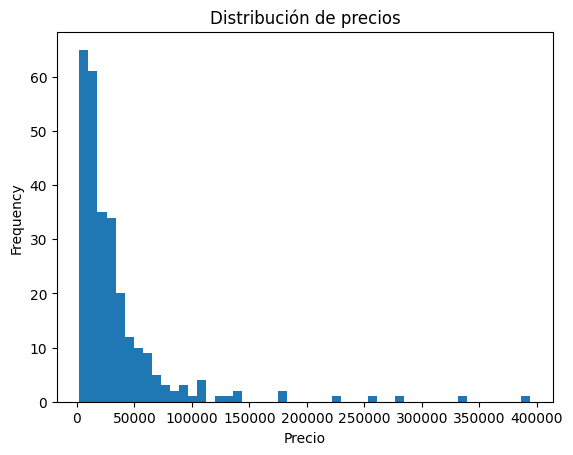

In [20]:
# Distribución de precios
import matplotlib.pyplot as plt
data_audifonos['price'].plot(kind='hist', bins=50, title='Distribución de precios')
plt.xlabel('Precio')
plt.show()

In [21]:
#Por ahora con la base filtrada inicial: 
data_audifonos.head(2)
# data_audifonos['thumbnail']


,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,...,variations_data.175548595683.ratio,variations_data.175548595683.name,variations_data.175548595683.pictures_qty,variations_data.175548595683.inventory_id,variations_data.175548595683.user_product_id,brand,line,model,package_length,package_weight
2,MLA1242363814,Auriculares Bluetooth In-ear Gamer F9-5 Negro ...,new,938092-MLA45480677826_042021,MLA16224063,gold_special,https://www.mercadolibre.com.ar/auriculares-bl...,buy_it_now,MLA,MLA3697,...,NaN,NaN,NaN,NaN,NaN,Shenzhen Yihaotong,Bluetooth,F9-5,9.4 cm,100 g
5,MLA1388780429,Auriculares In-ear Gamer Inalámbricos Fan Pro ...,new,672453-MLA74054793774_012024,MLA26082615,gold_special,https://www.mercadolibre.com.ar/auriculares-in...,buy_it_now,MLA,MLA3697,...,NaN,NaN,NaN,NaN,NaN,Fan Pro,F9,F9-5 Plus,11.4 cm,100 g


## Preprocesamiento de imagenes

In [22]:
#Prueba para una sola imagen 
from PIL import Image
import requests
from io import BytesIO

def preprocess_image(image_url):
    """Descarga y preprocesa una imagen dada su URL."""
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    image = image.resize((128, 128))  # Redimensionar a 128x128
    return image

# Ejemplo de preprocesamiento de la primera imagen
image_url = data_audifonos.iloc[0]['thumbnail']
processed_image = preprocess_image(image_url)
processed_image.show()

### Vamos a extraer las características de esa sola imagen

In [23]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import numpy as np

# Cargar el modelo ResNet50 preentrenado, excluyendo la capa superior
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
# Modelo para extraer las características de la última capa de pooling global
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_features_resnet(image):
    """Extrae características de una imagen utilizando ResNet50."""
    # Convertir la imagen en un array
    image = img_to_array(image)
    # Asegurarse de que la imagen tenga el tamaño correcto
    image = np.resize(image, (128, 128, 3))
    # Expandir las dimensiones para que coincidan con el formato que espera el modelo (1, 128, 128, 3)
    image = np.expand_dims(image, axis=0)
    # Preprocesar la imagen de acuerdo con los requisitos de ResNet50
    image = preprocess_input(image)
    # Extraer características
    features = model.predict(image)
    # Aplanar las características para obtener un único vector de características
    features = features.flatten()
    return features

# Ejemplo de uso
# Asegúrate de que 'processed_image' es una de tus imágenes preprocesadas y redimensionadas a 128x128 píxeles
features_resnet = extract_features_resnet(processed_image)
print(f"Características extraídas con ResNet50: {features_resnet.shape}")


1/1 [==============================] - 0s 460ms/step
Características extraídas con ResNet50: (32768,)


In [24]:
# Ahora que exploraos que esto funciona, vamos a formalizarlo y extraer las primeras 100 imagenes
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import time 

def download_and_preprocess_image(image_url):
    """Descarga una imagen desde una URL, la redimensiona a 128x128 píxeles y la preprocesa."""
    try:
        response = requests.get(image_url)
        image = Image.open(BytesIO(response.content))
        image = image.resize((128, 128))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = preprocess_input(image)
        return image
    except Exception as e:
        print(f"Error al descargar o procesar la imagen {image_url}: {e}")
        return None

#La segunda función, que extrae los emeddings de las imagenes: 
def extract_features_for_images(df, model):
    """Extrae características de una lista de imágenes usando un modelo preentrenado.
        Recibe como input el data frame y el modelo de CNN que vamos a usar, en este caso RESNET50
        Devuelve: un arreglo de IDs y de embeddings
        """
    start_time=time.time() #tiempo de inicio 
    
    features_list = []
    ids =[]
    for _, row in df.iterrows():
        preprocessed_image = download_and_preprocess_image(row['thumbnail'])
        if preprocessed_image is not None:
            features = model.predict(preprocessed_image)
            features_flattened = features.flatten()
            features_list.append(features_flattened)
            ids.append(row['id']) #Guardemos el ID para luego pegarlo con otras bases
            
    end_time = time.time()
    total_time=end_time - start_time # Calculemos el tiempo que se demora
    
    print(f"Tiempo total que se demora en procesar {len(df)} imagenes: {total_time} segundos")
    return ids, features_list



In [25]:
# Inicializamos el modelo ResNet50 y la llamamos en la funcion que definimos andes
from tensorflow.keras.applications.resnet50 import ResNet50

# Inicializar el modelo ResNet50
model = ResNet50(weights='imagenet', include_top=False)
model = Model(inputs=model.input, outputs=model.output)

# La lista de imagenes para un n=100
data_audifonos_subset=data_audifonos.head(100)

#Extraemos las características
ids, features_list= extract_features_for_images(data_audifonos_subset, model)

1/1 [==============================] - 0s 31ms/step
Tiempo total que se demora en procesar 100 imagenes: 7.530602931976318 segundos


In [26]:
print(features_list)

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.02994251, 0.        , 0.        , ..., 0.        , 0.        ,
       1.3526525 ], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.        , 0.33481002,
       0.        ], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.00452638, 0.64616895,
       0.        ], dt

In [27]:
#Otros modelos: 
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input as preprocess_input_inceptionv3
from tensorflow.keras.applications.xception import Xception, preprocess_input as preprocess_input_xception
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as preprocess_input_mobilenetv2
import time 

#Ajustamos las funciones para que se adapten a diferentes modelos que tienen diferentes funciones de preprocesamiento. 

def download_and_preprocess_image_for_model(image_url, preprocess_input_func, target_size):
    try:
        response = requests.get(image_url)
        image = Image.open(BytesIO(response.content)).convert('RGB')
        image = image.resize(target_size)
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = preprocess_input_func(image)
        return image
    except Exception as e:
        print(f"Error al procesar la imagen {image_url}: {e}")
        return None

def extract_features_for_model(df, model, preprocess_input_func, target_size):
    start_time = time.time()
    
    features_list = []
    ids = []
    for _, row in df.iterrows():
        preprocessed_image = download_and_preprocess_image_for_model(row['thumbnail'], preprocess_input_func, target_size)
        if preprocessed_image is not None:
            features = model.predict(preprocessed_image)
            features_flattened = features.flatten()
            features_list.append(features_flattened)
            ids.append(row['id'])
    
    end_time = time.time()
    print(f"Tiempo total para procesar {len(df)} imágenes con {model.name}: {end_time - start_time} segundos")
    
    return ids, features_list


In [28]:
#Vamos con diferentes modelos: 

# Inicializar el modelo InceptionV3
model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False)
model_inceptionv3 = Model(inputs=model_inceptionv3.input, outputs=model_inceptionv3.output)

# Ajustamos tamaño a modelo de entrada
target_size_inceptionv3 = (299, 299)  # Tamaño de entrada para InceptionV3

# Extraer características usando InceptionV3
ids_inceptionv3, features_list_inceptionv3 = extract_features_for_model(data_audifonos_subset, model_inceptionv3, preprocess_input_inceptionv3, target_size_inceptionv3)


1/1 [==============================] - 0s 46ms/step
Tiempo total para procesar 100 imágenes con model_2: 9.019439697265625 segundos


In [29]:
#Ahora Xception 
from tensorflow.keras.applications.xception import Xception, preprocess_input

# Cargar el modelo Xception preentrenado
model_xception = Xception(weights='imagenet', include_top=False)
model_xception = Model(inputs=model_xception.input, outputs=model_xception.output)

#Tamaños de entrada: 
target_size_xception = (299, 299)  # Tamaño de entrada para InceptionV3

ids_xception, features_list_xception = extract_features_for_model(data_audifonos_subset, model_xception, preprocess_input, target_size_xception)


1/1 [==============================] - 0s 63ms/step
Tiempo total para procesar 100 imágenes con model_3: 10.696038961410522 segundos


### Explicar cada una y por qué se saca la última capa

1. Estructura y Función de las Capas: Las redes neuronales convolucionales están estructuradas de tal manera que las capas inferiores (cercanas a la entrada) aprenden características generales y de bajo nivel (como bordes y texturas), mientras que las capas superiores (cercanas a la salida) aprenden características de alto nivel más específicas del conjunto de datos sobre el cual la red fue entrenada originalmente. Por ejemplo, en un modelo entrenado en ImageNet, las capas superiores podrían estar especializadas en distinguir entre diferentes razas de perros o categorías de objetos.

2. Flexibilidad y Generalización: Al excluir la capa superior y utilizar las capas inferiores para extracción de características, se aprovechan estas representaciones generales de bajo y medio nivel que son útiles para una amplia gama de tareas de visión por computadora, más allá de la clasificación original para la cual fue entrenada la red. Estas características extraídas pueden entonces ser usadas para entrenar un nuevo clasificador (o cualquier otro tipo de modelo de aprendizaje supervisado o no supervisado) específico para tu conjunto de datos y tarea particular.


In [30]:
#Ahora con eficiente net
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnet

#Hay que asegurarse de tenerlo instalado: pip install -U efficientnet
from tensorflow.keras.applications import EfficientNetB0

# Cargar el modelo EfficientNetB0 preentrenado, excluyendo la capa superior
model_efficientnetb0 = EfficientNetB0(include_top=False, weights='imagenet', pooling='avg')
model_efficientnetb0 = Model(inputs=model_efficientnetb0.input, outputs=model_efficientnetb0.output)

#Tamaños de entrada: 
target_efficient = (224, 224)  # Tamaño de entrada para InceptionV3

ids_efficientnetb0, features_list_efficientnetb0 = extract_features_for_model(
    data_audifonos_subset, 
    model_efficientnetb0, 
    preprocess_input_efficientnet, 
    target_efficient
)


1/1 [==============================] - 0s 29ms/step
Tiempo total para procesar 100 imágenes con model_4: 7.0546698570251465 segundos


## Ya con embeddings de imagenes ahora vamos con los de textos

1. Agrupamiento de las imagenes utilizando kmeans

In [31]:
from sklearn.cluster import KMeans

#La lista de emeddings de las imagenes en un array de Numpy para agruparlas:
X=np.array(features_list)

#Aplicamos K-means para agrupar las imágenes, en 10 grupos (ver regla del codo)
kmeans=KMeans(n_clusters=10, random_state=42).fit(X)

# Etiquetas de los grupos resultantes
labels = kmeans.labels_

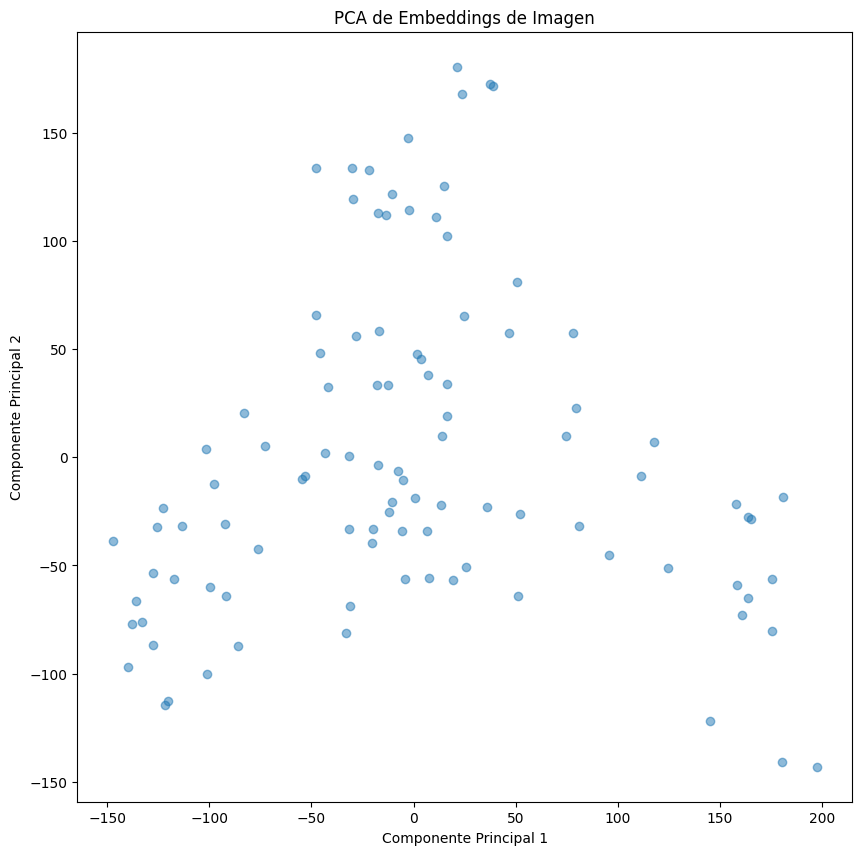

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA para reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Visualizar los embeddings reducidos
plt.figure(figsize=(10, 10))
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=0.5)
plt.title('PCA de Embeddings de Imagen')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [33]:
#Pongamos las imagenes en carpetas de data final
import os
from importlib import reload
import similarity.config
reload(similarity.config)
from similarity.config import API_URL, data_final

n_clusters= len(set(labels))

#Creamos una carpeta por grupo
for i in range(n_clusters):
    os.makedirs(os.path.join(data_final, f"Grupo_{i}"), exist_ok=True)
    
#Descargamos las imagenes a la carpeta del grupo al que pertenece
def download_image(image_url, save_path):
    """Descarga una imagen y la guarda en un archivo específico."""
    try:
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
    except Exception as e:
        print(f"Error al descargar {image_url}: {e}")


/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final


In [34]:
from pathlib import Path
# Imagenes están en DataFrame `data_audifonos` con 'id', 'thumbnail' (URLs de las imágenes) y los 'ids' corresponden a los 'labels'
for _, row in data_audifonos_subset.iterrows():
    image_id = row['id']
    image_url = row['thumbnail']
    # Encuentra el label del grupo para esta imagen
    group_label = labels[ids.index(image_id)]
    # Define el path donde se guardará la imagen
    save_path = os.path.join(data_final, f"Grupo_{group_label}", f"{image_id}.jpg")
    p_completi=Path(save_path).resolve()
    print(p_completi)
    # Descarga y guarda la imagen
    download_image(image_url, save_path)


/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_4/MLA1242363814.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_4/MLA1388780429.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_1/MLA1381152873.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_4/MLA1439029838.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_4/MLA1294245045.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_4/MLA1479723106.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_8/MLA1394623735.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_4/MLA1378135041.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_4/MLA1378110891.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_9/MLA1290998146.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Gru

## TRANSFORMERS!
BERT (Bidirectional Encoder Representation from Transformetrs) 
    Nos ayudará a capturar la similitud contextual entre fragmentos de texto 
    En este caso lo usamos para agrupar los productos con base en descripciones o titulos

NLP: Procesamiento de Lenguaje Natural. 
- Comprensión Contextual: A diferencia de los enfoques anteriores, BERT puede entender el contexto de cada palabra en una oración, lo que es crucial para entender el significado completo de los títulos de productos que pueden incluir jerga técnica y números.

- Flexibilidad: Puedes usar BERT para una amplia gama de tareas de NLP, desde clasificación de texto y extracción de entidades hasta generación de texto y análisis de sentimientos.
- Eficiencia: Con modelos como DistilBERT, puedes obtener muchos de los beneficios de BERT con menos recursos computacionales.

## Limpieza de textos 

1. Limpieza y normalizacion
2. Tokenizacion y eliminar palabras vacias

In [42]:
# Vamos a crear funciones para limpiar el texto 
import re 

def limpiar_texto(text):
    """ Función que nos servirá para limpiar y nornalizar el texto.
    """
    text=text.lower() # Lo pasamos a minusculas
    # Eliminamos caracteres especiales pero dejamos los números y espacios
    text = re.sub(r'[^a-z0-9\s]', '', text)
    # Eliminamos espacios adicionales
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#Aplicamos la funcion a los titulos 

data_audifonos['cleaned_title']=data_audifonos['title'].apply(limpiar_texto)
data_audifonos_subset['cleaned_title'] = data_audifonos_subset['title'].apply(limpiar_texto)
print(data_audifonos[['title','cleaned_title']].head(5))

                                                title  \
2   Auriculares Bluetooth In-ear Gamer F9-5 Negro ...   
5   Auriculares In-ear Gamer Inalámbricos Fan Pro ...   
7           Auriculares In-ear Inalámbricos A6s Negro   
11  Auriculares Inalambricos A8s Alpina Touch 25 H...   
13  Auriculares In-ear Gamer Inalámbricos Tws F9-5...   

                                        cleaned_title  
2   auriculares bluetooth inear gamer f95 negro in...  
5   auriculares inear gamer inalmbricos fan pro f9...  
7             auriculares inear inalmbricos a6s negro  
11  auriculares inalambricos a8s alpina touch 25 h...  
13  auriculares inear gamer inalmbricos tws f95 bt...  


/var/folders/m8/p0y07mnx0xj8nxd8l9zj7fn00000gn/T/ipykernel_70694/1718598405.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m8/p0y07mnx0xj8nxd8l9zj7fn00000gn/T/ipykernel_70694/1718598405.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
#Cargamos modelo pre-entrenado
import torch
from transformers import BertModel, BertTokenizer

# Cargar el tokenizador y modelo preentrenado de BERT
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [41]:
data_audifonos_subset.head(2)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,...,variations_data.175548595683.ratio,variations_data.175548595683.name,variations_data.175548595683.pictures_qty,variations_data.175548595683.inventory_id,variations_data.175548595683.user_product_id,brand,line,model,package_length,package_weight
2,MLA1242363814,Auriculares Bluetooth In-ear Gamer F9-5 Negro ...,new,938092-MLA45480677826_042021,MLA16224063,gold_special,https://www.mercadolibre.com.ar/auriculares-bl...,buy_it_now,MLA,MLA3697,...,NaN,NaN,NaN,NaN,NaN,Shenzhen Yihaotong,Bluetooth,F9-5,9.4 cm,100 g
5,MLA1388780429,Auriculares In-ear Gamer Inalámbricos Fan Pro ...,new,672453-MLA74054793774_012024,MLA26082615,gold_special,https://www.mercadolibre.com.ar/auriculares-in...,buy_it_now,MLA,MLA3697,...,NaN,NaN,NaN,NaN,NaN,Fan Pro,F9,F9-5 Plus,11.4 cm,100 g


In [43]:
# Tokenizar y preparar los titulos para BERT:
def encode_titles_bert(data, tokenizer, max_length=512):
    titles=data['cleaned_title'].tolist()
    encoding=tokenizer(titles, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
    return encoding

# Titulos preparados
encoded_inputs=encode_titles_bert(data_audifonos_subset, tokenizer_bert)


In [44]:
#Extracción de embddings 
with torch.no_grad():  # No es necesario calcular gradientes para la extracción de características
    outputs = model(**encoded_inputs)
    # Las características del último estado oculto representan las embeddings de los títulos
    text_embeddings = outputs.last_hidden_state[:, 0, :].numpy()


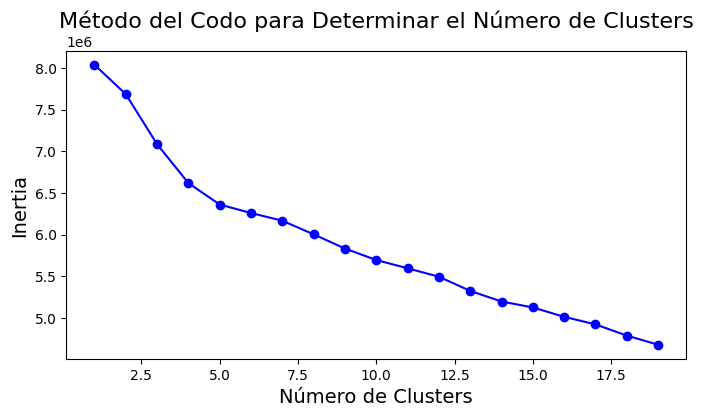

In [48]:
#Combinemos los embeddings de texto y los de imagenes (esto sería como un supper embedding)
combined_features = np.concatenate([text_embeddings, features_list], axis=1)

#Con ese super embedding podemos hacer el cluster, pero primero apliquemos una heurística "regla del codo" a ver qué se recomienda
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculamos la suma de cuadrados dentro de los grupos para diferentes números de clusters
inertias = []
for i in range(1, 20):  # Prueba con un rango de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42).fit(combined_features)
    inertias.append(kmeans.inertia_)

# Grafica la suma de cuadrados dentro de los grupos
plt.figure(figsize=(8, 4))
plt.plot(range(1, 20), inertias, 'bo-')
plt.xlabel('Número de Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Método del Codo para Determinar el Número de Clusters', fontsize=16)
plt.show()

# Se sugieren 5


In [55]:
#Metricas de la calidad del cluster
from sklearn.metrics import silhouette_score, silhouette_samples

# Calcula el score de silueta para el número óptimo de clusters determinado anteriormente
optimal_clusters = 5  # Esto dado que en 5 parece cambiar la pendiente
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42).fit(combined_features)

silhouette_avg = silhouette_score(combined_features, kmeans_optimal.labels_)
print(f"El score de silueta promedio para {optimal_clusters} clusters es: {silhouette_avg}")

cluster_labels = kmeans_optimal.labels_

# Calcular el score de silueta para cada instancia
silhouette_vals = silhouette_samples(combined_features, cluster_labels)

# Crear un DataFrame para análisis
df_clusters = pd.DataFrame({'cluster': cluster_labels, 'silhouette': silhouette_vals})
for i in range(optimal_clusters):
    cluster_features = combined_features[cluster_labels == i]
    df_clusters.loc[df_clusters['cluster'] == i, 'mean'] = cluster_features.mean(axis=1)
    df_clusters.loc[df_clusters['cluster'] == i, 'std'] = cluster_features.std(axis=1)

# Calcular estadísticas agregadas por cluster
cluster_stats = df_clusters.groupby('cluster').agg(
    silhouette_mean=('silhouette', 'mean'),
    silhouette_std=('silhouette', 'std'),
    features_mean=('mean', 'mean'),
    features_std=('std', 'mean')
).reset_index()

print(cluster_stats)

El score de silueta promedio para 5 clusters es: 0.07936658710241318
   cluster  silhouette_mean  silhouette_std  features_mean  features_std
0        0         0.270645        0.125253       0.513843      1.805220
1        1         0.094197        0.040602       0.518918      1.801547
2        2         0.102892        0.057784       0.565311      1.983926
3        3         0.009476        0.034884       0.476155      1.697845
4        4         0.072897        0.026415       0.470278      1.711639


In [61]:
#Descarguemos las imagenes y pongamoslas en carpetas para ver qué tal quedó: 
#Creamos una carpeta por grupo (sobreescribimos si ya existen)
import shutil
for i in range(optimal_clusters):
    os.makedirs(os.path.join(data_final, f"Grupo_{i}"), exist_ok=True)
    
#Descargamos las imagenes a la carpeta del grupo al que pertenece
def download_image(image_url, save_path):
    """Descarga una imagen y la guarda en un archivo específico."""
    try:
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
    except Exception as e:
        print(f"Error al descargar {image_url}: {e}")

from pathlib import Path
# Imagenes están en DataFrame `data_audifonos` con 'id', 'thumbnail' (URLs de las imágenes) y los 'ids' corresponden a los 'labels'
for _, row in data_audifonos_subset.iterrows():
    image_id = row['id']
    image_url = row['thumbnail']
    # Encuentra el label del grupo para esta imagen
    group_label = cluster_labels[ids.index(image_id)]
    # Define el path donde se guardará la imagen
    save_path = os.path.join(data_final, f"Grupo_{group_label}", f"{image_id}.jpg")
    p_completi=Path(save_path).resolve()
    print(p_completi)
    # Descarga y guarda la imagen
    download_image(image_url, save_path)

/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_1/MLA1242363814.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_1/MLA1388780429.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_4/MLA1381152873.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_1/MLA1439029838.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_1/MLA1294245045.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_1/MLA1479723106.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_4/MLA1394623735.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_1/MLA1378135041.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_1/MLA1378110891.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Grupo_4/MLA1290998146.jpg
/Users/anfelipecb/GitHub/MeLi/MeLi_Challenge_Similarity/data/final/Gru

1

In [ ]:
Me falta calcular y mostrar la similitud, luego puedo hacer el cluster pos similitud?
Podria querer para cada item i dar por ejemplo los 5 o 10 más parecidos. 

### Ya que esto funcionó, voy a proceder a generalizarlo para todos los datos que pueda encontrar de esas referencias

fin 